In [13]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#!pip install gender_guesser
#!pip install ipyleaflet
#!pip install geocoder
#!pip install unidecode
#!pip install gender_guesser

     |████████████████████████████████| 379 kB 137 kB/s eta 0:00:01


### Kartenvisualisierung mit einer dynamischen Suche

In [1]:
from ipywidgets import HBox
from widgets import createCheckBox
from prepare_data import getJSON
from mapviz import *
import numpy as np

data = getJSON('data/records.json')
 
an = createCheckBox("to AvH", False)
von = createCheckBox("by AvH", False)

display(HBox([an, von]))
an.observe(an_change)
von.observe(von_change)

### Kartenvisualisierung mit Suche nach Datum

In [20]:
from ipywidgets import HBox
from search_dynamic import btn_new_search
from prepare_data import getJSON
from mapviz import *

data = getJSON("data/records.json")

display(HBox([by_date(data), btn_new_search()]))

{'key': 'H0005221', 'geoname_id': '2950159', 'address': 'Berlin', 'coordinates': [13.41053, 52.52437]}
{'key': 'H0005221', 'geoname_id': '2950159', 'address': 'Berlin', 'coordinates': [13.41053, 52.52437]}
{'key': 'H0005309', 'geoname_id': '2946447', 'address': 'Bonn', 'coordinates': [7.09549, 50.73438]}
{'key': 'H0005221', 'geoname_id': '2950159', 'address': 'Berlin', 'coordinates': [13.41053, 52.52437]}
{'key': 'H0008129', 'geoname_id': '2988507', 'address': 'Paris', 'coordinates': [2.3488, 48.85341]}
{'key': 'H0008129', 'geoname_id': '2988507', 'address': 'Paris', 'coordinates': [2.3488, 48.85341]}
{'key': 'H0005221', 'geoname_id': '2950159', 'address': 'Berlin', 'coordinates': [13.41053, 52.52437]}
{'key': 'H0008129', 'geoname_id': '2988507', 'address': 'Paris', 'coordinates': [2.3488, 48.85341]}
{'key': 'H0008129', 'geoname_id': '2988507', 'address': 'Paris', 'coordinates': [2.3488, 48.85341]}
{'key': 'H0011492', 'geoname_id': '2643743', 'address': 'London', 'coordinates': [-0.125

Map(center=[35.52437, -30.41053], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom…

### Histogramm mit dem Anzahl des Briefwechsels durch die Zeit

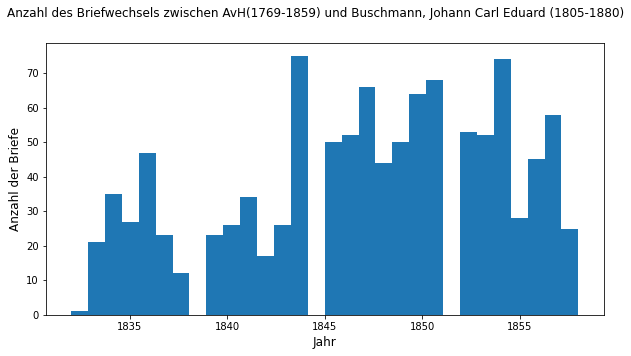

In [3]:
from ipywidgets import HBox
from search_dynamic import btn_new_search
from prepare_data import getJSON
import matplotlib.pyplot as plt
#from mapviz import *

data = getJSON("data/records.json")

def person_change(change): 
    if change['type'] == 'change' and change['name'] == 'value':
        person = change['new']
        results = []
        # get the corresponding letters
        for i in data:
            try : 
                if change['new'] in i["creator"] or change['new'] in i["subject"]:
                    results.append(i)
            except: pass
        
        # from corresponding letters, get and transform the data to build the histogramm
        liste = []
        for i in results:
            try :
                if int(i['date'][:4]) <1859:
                    liste.append((int(i['date'][:4]), int(1)))
            except:pass
            
            
        # create the histogramm
        title = 'Anzahl des Briefwechsels zwischen AvH(1769-1859) und ' + person
        x_coords = [coord[0] for coord in liste]
        y_coords = [coord[1] for coord in liste]
        fig= plt.figure(figsize=(10,5))
        plt.hist(x_coords, bins=30)
        fig.suptitle(title, fontsize=12)
        plt.xlabel('Jahr', fontsize=12)
        plt.ylabel('Anzahl der Briefe', fontsize=12)
        plt.show()


def by_person(data:dict):
    """
    Function that creates a dropdown menu of all persons 
    who have received and/or sent at least one letter 
    for which a date is recorded
    :param data: dict
    :return: dropdown menu
    :rtype: widget
    """
    # Get the letters which have a recorded date
    with_date= []
    for i in data:
        try:
            if bool(i['date']) == True:
                with_date.append(i)
        except:pass
        
    # Get all people who received or sent a letter    
    creators = avoidTupleInList(nested_lookup('creator', with_date))
    subjects = avoidTupleInList(nested_lookup('subject', with_date))
    people = []
    
    # Delete Humboldt from creators' and subjects' lists
    for i in creators:
        if '[' in i :
            i = i.split(' [vermutlich]')[0]
        if 'Humboldt' not in i:
            people.append(i)
    for i in subjects:
        if 'Humboldt' not in i and i not in people:
            people.append(i)

    #Create dropdown Menu
    dropdown = createDropdown('', people)
    dropdown.observe(person_change)
    return dropdown 

display(HBox([by_person(data), btn_new_search()]))

### Graphik der Alterverteilung

In [5]:
from prepare_data import getJSON, avoidTupleInList
from nested_lookup import nested_lookup
import matplotlib.pyplot as plt


data = getJSON("data/records.json")
years_an = {}
years_von = {}
    
# Briefe AN Humboldt
for i in data :
    try :
        if i["date"] and "Humboldt" not in i["creator"] and type(i["creator"]) != list :
            if i["date"][:4] not in years_an:
                years_an[i["date"][:4]] = []
            years_an[i["date"][:4]].append(int(i["date"][:4]) - int(i["creator"].split("(")[1].split("-")[0][:4]))
    except: pass 

# Briefe VON Humboldt     
for i in data :
    try :
        if i["date"] and "Humboldt" not in i["subject"] and type(i["subject"]) != list :
            if i["date"][:4] not in years_von:
                years_von[i["date"][:4]] = []
            years_von[i["date"][:4]].append(int(i["date"][:4]) - int(i["subject"].split("(")[1].split("-")[0][:4]))
    except: pass 

In [6]:
liste_an=[]
liste_von=[]

for element in years_an.keys():
    if (float(element)<1859):
        for element1 in years_an[element]: 
            if (float(element1)>0):
                liste_an.append((float(element), float(element1)))
                
for element in years_von.keys():
    if (float(element)<1859):
        for element1 in years_von[element]: 
            if (float(element1)>0):
                liste_von.append((float(element), float(element1)))


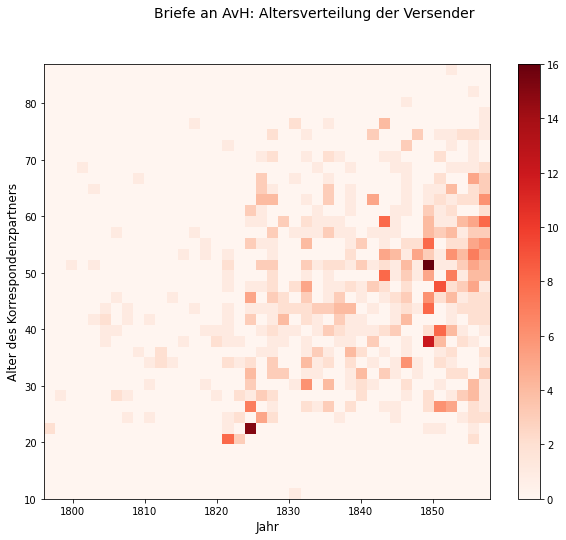

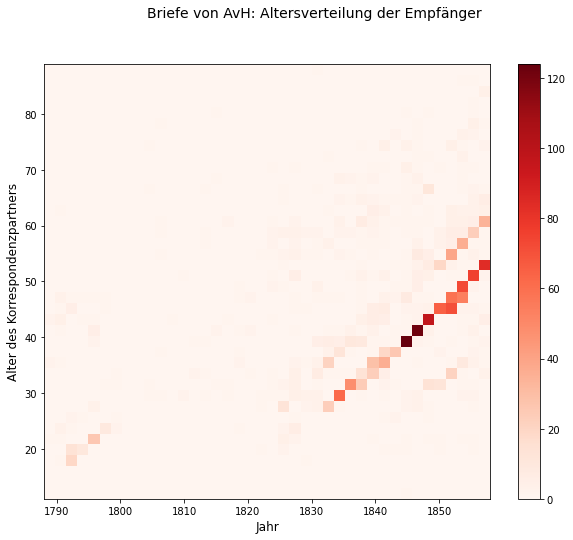

In [7]:
from ipywidgets import HBox
x_coords = [coord[0] for coord in liste_an]
y_coords = [coord[1] for coord in liste_an]
fig= plt.figure(figsize=(10,8))
plt.hist2d(x_coords, y_coords, bins=(40, 40), cmap=plt.cm.Reds)
fig.suptitle('Briefe an AvH: Altersverteilung der Versender', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Alter des Korrespondenzpartners', fontsize=12)
plt.colorbar()
an_plt = plt.show()


von_x_coords = [coord[0] for coord in liste_von]
von_y_coords = [coord[1] for coord in liste_von]
fig= plt.figure(figsize=(10,8))
plt.hist2d(von_x_coords, von_y_coords, bins=(40, 40), cmap=plt.cm.Reds)
fig.suptitle('Briefe von AvH: Altersverteilung der Empfänger', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Alter des Korrespondenzpartners', fontsize=12)
plt.colorbar()
von_plt = plt.show()



### Histogramm der Häufigkeit des Alters

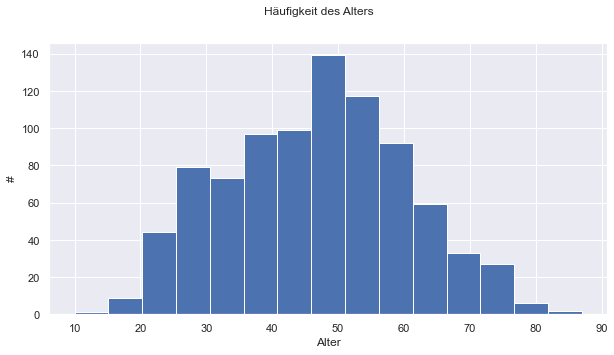

In [268]:
fig= plt.figure(figsize=(10,5))
plt.hist(y_coords, bins=15)
fig.suptitle('Häufigkeit des Alters', fontsize=12)
plt.xlabel('Alter', fontsize=12)
plt.ylabel('#', fontsize=12)
plt.show()

### Anteil der Korrespondentzpartnerinnen

In [5]:
import gender_guesser.detector as gender
from mapviz import is_male_name

data = getJSON("data/records.json")
guess = gender.Detector()

count_men = 0
count_women = 0
data_women = []

# Briefe AN AvH
for i in data:
    try :
        if 'Humboldt' not in i['creator'] and 'Unbekannt' not in i['creator'] and type(i['creator']) != list:
            firstname = i['creator'].split(' ')[0]
            gender =guess.get_gender(firstname)
            if gender == 'unknown':
                firstname = i['creator'].split(', ')[1].split(' (')[0]
                gender =guess.get_gender(firstname)
                
                if ' ' in firstname :
                    firstname = firstname.split(' ')[0]
                elif '-' in firstname :
                    firstname = firstname.split('-')[0]
                    
                if is_male_name(firstname) == True:
                    gender = 'male'
                elif firstname == 'Henriette':
                    gender = 'female'
                else : 
                    gender = guess.get_gender(firstname)
                    
            if 'female' in gender:
                count_women +=1
                data_women.append(i)
            elif gender == 'male' or gender == 'mostly_male' :
                count_men +=1

    except: pass

# Briefe VON AvH
for i in data:
    try :
        if 'Humboldt' not in i['subject'] and 'Unbekannt' not in i['subject'] and type(i['subject']) != list:
            firstname = i['subject'].split(' ')[0]
            gender =guess.get_gender(firstname)
            if gender == 'unknown':
                firstname = i['subject'].split(', ')[1].split(' (')[0]
                gender =guess.get_gender(firstname)
                if ' ' in firstname :
                    firstname = firstname.split(' ')[0]
                elif '-' in firstname :
                    firstname = firstname.split('-')[0]
                if is_male_name(firstname) == True:
                    gender = 'male'
                elif firstname == 'Henriette':
                    gender = 'female'
                else : 
                    gender =guess.get_gender(firstname)
                    
            if 'female' in gender:
                count_women +=1
                data_women.append(i)

            elif gender == 'male' or gender == 'mostly_male' :
                count_men +=1

    except: pass

print(len(data))
print(count_men)
print(count_women)
print('Anteil der Korrespondenzpartnerinnen :' + str(100 * count_women/count_men) + '%')

'''
Humboldt erhielt 8 Briefe von Frauen und schickte 61 an Frauen. 
Viele sind Herzogin, Gräfin oder sogar Königin. 
2,3 % Korrespondenz von Humboldt wurde an Frauen geschickt. 
0,7 % ist der Anteil von Briefe an AvH, die von Frauen geschrieben wurde.
Humboldt schrieb mehr Briefe an Frauen, als er von ihnen erhielt.
Alle Briefe zusammengenommen, entspricht dies 1,8% der AvH-Korrespondenz.

'''

4932
3925
70
Anteil der Korrespondenzpartnerinnen :1.78343949044586%


'\nHumboldt erhielt 8 Briefe von Frauen und schickte 61 an Frauen. \nViele sind Herzogin, Gräfin oder sogar Königin. \n2,3 % Korrespondenz von Humboldt wurde an Frauen geschickt. \n0,7 % ist der Anteil von Briefe an AvH, die von Frauen geschrieben wurde.\nHumboldt schrieb mehr Briefe an Frauen, als er von ihnen erhielt.\nAlle Briefe zusammengenommen, entspricht dies 1,8% der AvH-Korrespondenz.\n\n'

### Korrespondenzpartnerinnen

Für diese Briefe sind keine Daten verzeichnet. Eine Visualisierung mit einem Histogramm ist nicht möglich. Wenn es möglich, sind die Daten dann auf einer Karte dargestellt. Die Punkte stellen die Lagersort der Briefe dar.


Map(center=[35.52437, -30.41053], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom…

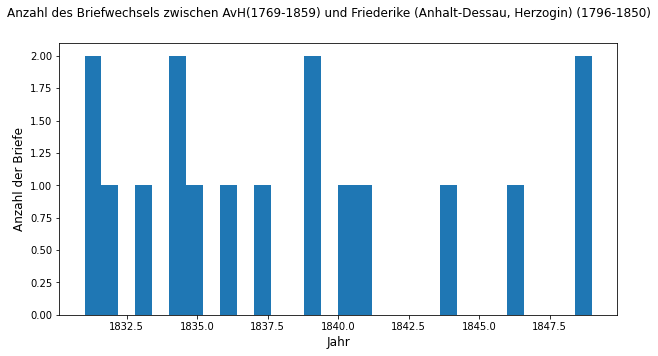

In [7]:
from ipywidgets import HBox
from search_dynamic import btn_new_search
from prepare_data import getJSON
import matplotlib.pyplot as plt
from IPython.display import display

data = getJSON("data/records.json")

def show_contributors(data: list, by : str, first: bool):
    m = Map(
            center=(35.52437, -30.41053),
            zoom=2,
            close_popup_on_click=False
            )
    
    cities = {}
    marker = None
    for i in data:
            try :
                if i[by]["address"] not in cities:
                    city = i[by]["address"]
                    cities[city] = {'message' : '', 'coordinates':[]}
                    if 'Humboldt' in i['creator']:
                        who = i['creator']
                    cities[city]["message"] = i['title'] + "<br><i>"+ i["contributor"] +"</i> <br> <a href=\""+ i["identifier"][1] + "\" target=\"_blank\">auf Kalliope</a> <hr>"
                    cities[city]["coordinates"] = [i[by]["coordinates"][1], i[by]["coordinates"][0]]
                elif i[by]["address"] in cities:
                    city = i[by]["address"]
                    cities[city]["message"] = cities[city]["message"] + " </b> " + i["title"] + "<br><i>"+ i["contributor"]  + "</i><br> <a href=\""+ i["identifier"][1] + "\" target=\"_blank\">auf Kalliope</a> <hr>"
            except : pass

    
    for i in cities.keys():
            try :
                message = HTML()
                if cities[i]["message"].count("<hr>") <3 :
                    message.value = cities[i]["message"]
                else : 
                    message.value = cities[i]["message"].split('<hr>')[0] + '<hr>' + str(cities[i]["message"].count("<hr>")-1) + " andere Briefe. Es ist aber zu viele Ergebnisse, um alle hier zu zeigen."
                message.description = i.upper()
                marker = Marker(location=(cities[i]["coordinates"][0], cities[i]["coordinates"][1]))
                m.add_layer(marker)
                marker.popup = message
            except: pass

    display(m)
    
       
    
def women_change(change): 
    if change['type'] == 'change' and change['name'] == 'value':
        person = change['new']
        results = []
        # get the corresponding letters
        for i in data:
            try : 
                if change['new'] in i["creator"] or change['new'] in i["subject"]:
                    results.append(i)
            except: pass
        
        # from corresponding letters, get and transform the data to build the histogramm
        liste = []
        for i in results:
            try :
                if int(i['date'][:4]) <1859:
                    liste.append((int(i['date'][:4]), int(1)))
            except: 
                pass

        print('Für diese Briefe sind keine Daten verzeichnet. Eine Visualisierung mit einem Histogramm ist nicht möglich. Wenn es möglich, sind die Daten dann auf einer Karte dargestellt. Die Punkte stellen die Lagersort der Briefe dar.')
        show_contributors(results, 'contributor_location', True)

            
        # create the histogramm
        title = 'Anzahl des Briefwechsels zwischen AvH(1769-1859) und ' + person
        x_coords = [coord[0] for coord in liste]
        y_coords = [coord[1] for coord in liste]
        fig= plt.figure(figsize=(10,5))
        plt.hist(x_coords, bins=30)
        fig.suptitle(title, fontsize=12)
        plt.xlabel('Jahr', fontsize=12)
        plt.ylabel('Anzahl der Briefe', fontsize=12)
        plt.show()


def by_women(data:dict):
    """
    Function that creates a dropdown menu of all persons 
    who have received and/or sent at least one letter 
    for which a date is recorded
    :param data: dict
    :return: dropdown menu
    :rtype: widget
    """
 
    # Get all people who received or sent a letter    
    creators = avoidTupleInList(nested_lookup('creator', data))
    subjects = avoidTupleInList(nested_lookup('subject', data))
    people = []
    
    # Delete Humboldt from creators' and subjects' lists
    for i in creators:
        if '[' in i :
            i = i.split(' [vermutlich]')[0]
        if 'Humboldt' not in i:
            people.append(i)
    for i in subjects:
        if 'Humboldt' not in i and i not in people:
            people.append(i)

    #Create dropdown Menu
    dropdown = createDropdown('', people)
    dropdown.observe(women_change)
    return dropdown 


display(HBox([by_women(data_women), btn_new_search()]))

### Berufe

In [417]:
from prepare_data import getJSON, writeJSON
import unidecode

data = getJSON("data/records.json") #1667 personnes
edh_pers = getJSON("data/personen.json") #2060 personnes

creators = avoidTupleInList(nested_lookup('creator', data))
subjects = avoidTupleInList(nested_lookup('subject', data))
people = [] #Beispiel : Turpin, Pierre Jean François (1775-1840)

#unaccented_string = unidecode.unidecode(accented_string)

for i in creators:
    if '[' in i :
        i = i.split(' [vermutlich]')[0]
    if 'Humboldt' not in i:
        people.append(i)
for i in subjects:
    if 'Humboldt' not in i and i not in people:
        people.append(i)

statut = {}
for i in people:
    try:
        if 'Herzog' in i or 'König' in i:
            continue
            
        else :
            name = i.split(', ')[0]
            firstname = i.split(', ')[1].split(' (')[0]
            both = firstname + ' ' + name

            #print(name)
            for p in edh_pers:
                if unidecode.unidecode(name) in unidecode.unidecode(edh_pers[p]['Name']) and unidecode.unidecode(firstname) in unidecode.unidecode(edh_pers[p]['Name']):
                    if type(edh_pers[p]['Note']) == dict :
                        statut[both]= edh_pers[p]['Note']['#text']
                    else :
                        statut[both]= edh_pers[p]['Note']

    except:pass

print(len(people))
print(len(statut))
#writeJSON('data/statut_people_kalliope.json', statut)


1667
115


In [418]:
statut_pers = getJSON("data/statut_people_kalliope.json")

statut_count = {'wissenschaft' : 0 , 'politik' : 0, 'recht' : 0, 'ehefrau' : 0, 'schriftsteller' : 0, 'offizier':0, 'bibliothekar':0, 'architekt':0}

wissenschaftler = ['astronom', 'ingenieur', 'botaniker', 'physiker', 'chemie', 'forscher', 'geolog', 'geograph', 'historiker' ]
politik = ['staatsman', 'diplomat', 'rechtsminister']
recht = ['richter', 'anwalt', 'justizminister']

for i in statut_pers:
    for p in statut_count:
        if p in statut_pers[i].lower():
            statut_count[p] +=1
        
    for beruf in politik:
        if beruf in statut_pers[i].lower():
            statut_count['politik'] +=1
    for beruf in recht:
        if beruf in statut_pers[i].lower():
            statut_count['recht'] +=1
    for beruf in wissenschaftler:
        if beruf in statut_pers[i].lower():
            statut_count['wissenschaft'] +=1



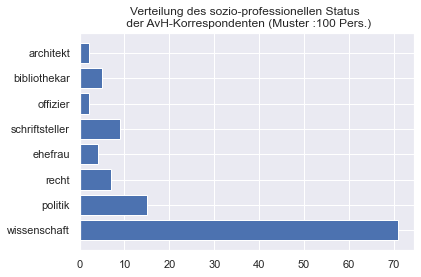

In [419]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

# create dataset
height = statut_count.values()
bars = statut_count.keys()
y_pos = np.arange(len(bars))
plt.title('Verteilung des sozio-professionellen Status \n der AvH-Korrespondenten (Muster :100 Pers.)') 

# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()